# Project: Rank Tweets by Kindness

**Sentiment Analysis**: Social media can be a great place to connect with others and share positive thoughts and experiences. However, it can also be a breeding ground for negativity and hate speech. This project aims to develop a system to rank tweets by kindness in order to promote more positive and supportive online interactions.

**Benefits:**

The proposed system has the potential to provide a number of benefits, including:

- Promoting more positive and supportive online interactions
- Reducing the spread of negativity and hate speech
- Helping people to find and connect with others who share their values
- Making social media a more enjoyable and welcoming place for everyone


**Tasks:**

The proposed system will use sentiment analysis to identify and rank tweets based on their level of kindness. This will be done by the following steps:

1. Read the `nice_words.txt` file into a list. This file will contain a list of words that are typically associated with kindness, such as "love," "compassion," and "gratitude."
1. Read the `tweets.txt` file into a tweets list. This file will contain a collection of tweets to be ranked.
1. Look at each of the tweets and count the number of nice words.
1. Sort the tweets in descending order based on the number of nice words, with the most kind tweet first.
1. Display the tweets, along with the count of nice words in each tweet.

*****
**Tools** :

***NLTK:*** The Natural Language Toolkit, commonly known as NLTK, is a comprehensive open-source platform for building applications to process human language data.It comes with powerful text processing libraries for typical Natural Language Processing (NLP) tasks like cleaning, parsing, stemming, tagging, tokenization, classification, semantic reasoning, etc. NLTK has user-friendly interfaces to several popular corpora and lexical resources Word2Vec, WordNet, VADER Sentiment Lexicon, etc. 
We use the SentimentIntensityAnalyzer class to assign a sentiment score to each tweet the tweets that we get from Twitter API.
Also, we used the polarity_score method of the SentimentIntensityAnalyzer class to generate a numeric score in the range of
negative one (-1) to positive one (+1) to indicate the intensity of how negative or positive the sentiment is.

The three sentiment type values are.
- neg for negative sentiment
- neu for neutral sentiment
- pos for positive sentiment
- compound for an overall score that combines negative, positive, and neutral sentiments into a single score.


***The RapidAPI:*** 
The RapidAPI is a platform that allows developers to access and integrate various APIs (Application Programming Interfaces) into their applications. 
These APIs provide a range of functionalities and data from different sources, including Tweets.
By using the RapidAPI, we easily retrieved *Tweets of users* and performed sentiment analysis using the SentimentIntensityAnalyzer. 
The API can provide a convenient way to access the reviews and pass them to the sentiment analysis tool.
*****

In [20]:
#Get tweet from API 
import requests

url = "https://twitter-scraper2.p.rapidapi.com/search"

querystring = {"searchTerms":"wikipedia","maxTweets":"70","lang":"en"}

headers = {
	"X-RapidAPI-Key": "*********************************",
	"X-RapidAPI-Host": "twitter-scraper2.p.rapidapi.com"
}



try:
    response = requests.get(url, headers=headers, params=querystring)
    tweets = response.json()
    
except json.JSONDecodeError as e:
    
    print("Error decoding JSON:", e)

In [ ]:
tweets

In [22]:
data = tweets['data']

In [23]:
#extract only tweets into list 

list_of_tweets = []
for result in data:
    for tweets in result['tweet'].items():
        if 'full_text' in tweets:
            for tweet in tweets[1:2]:
                list_of_tweets.append(tweet)  
list_of_tweets

['A Wikipedia tornou-se uma fonte de desinformação esquerdista!\n/\nOlha como são FOFOS\nos editores autorizados\n/\nA mesma falácia na versão em inglês\n@Wikipedia https://t.co/HqfEWRU8eY',
 "@PushpitaHumaira Main lead is the one in which entire focus goes in show and same goes with female lead\n\nItni si baat nahi pata kya saatvi fail\n\nIn today's world everyone knows credibility of wikipedia i can also edit wikipedia page which you are showing\n\n#SaubhagyavatiBhava #Flopvatibhavah2",
 "FINALLY. It's time to try the bra reinvented for small boobs. No more cup gaps, awkward padding or digging wires. Discover natural, flattering lift and boob-hugging comfort.",
 "@AncientEpoch @Wikipedia that to would have been a slightly inclined/road/ramp from which provisions should have been brought to the pyramid from North... let's discuss what provisions are in such a project... wood, food anything a ship could transfer and was needed but was not present at Giza...",
 '"Während des\xa0Jom-Kipp

In [24]:
#import Sentiment_Analyzer model
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

In [25]:
#call the model
sia = SentimentIntensityAnalyzer()

The Tweet is:
 @willsgardevoir haha take this reddit gold kind stranger https://t.co/2o9PaxgYGU

rank of the nice words that match in file: 1

the score of positive sentiment is 0.478, while the nigative sentiment score is 0.0
**********************************************************************************************************
The Tweet is:
 @MisterZip @ggreenwald Wikipedia.  "Trusted source."

rank of the nice words that match in file: 0

the score of positive sentiment is 0.437, while the nigative sentiment score is 0.0
**********************************************************************************************************
The Tweet is:
 Calling All Casino Enthusiasts!

We’ve rated the best Virginia online casinos based on factors including game variety, security, and payment methods. Virginia has some of the best operators in the market so players can expect generous bonuses and safe withdrawals.

rank of the nice words that match in file: 2

the score of positive sentiment i

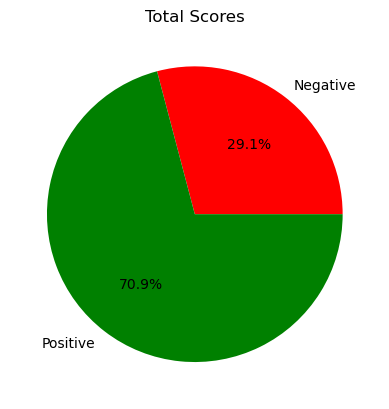

In [26]:
from collections import Counter
import matplotlib.pyplot as plt

def count_nice_words(tweet, nice_words):
 
    count_tweet = Counter(tweet.lower().split())
    nice_word_count = sum(count_tweet[word] for word in nice_words)
    
    #analyze each tweet 
    sentiment_scores = sia.polarity_scores(tweet)
    
    return nice_word_count, sentiment_scores  #dictionary  

def count_tweets():
     
        #read nice words file 
    with open('nice_words.txt', "r") as nice_words_file:
        nice_words = nice_words_file.read().split()
        
    tweet_counts = [(tweet, *count_nice_words(tweet, nice_words)) for tweet in list_of_tweets] #tweet,nice,scors
    
    #sorted baesd on positive scors, Each tuple contains a tweets and its corresponding sentiment scores. 
    sorted_tweets = sorted(tweet_counts, key=lambda x: x[2]['pos'], reverse=True)

    
    for tweet, nice_word_count, sentiment_scores in sorted_tweets:
        
        print("The Tweet is:\n", tweet)
        print("\nrank of the nice words that match in file:", nice_word_count)
        print(f"\nthe score of positive sentiment is {sentiment_scores['pos']}, while the nigative sentiment score is {sentiment_scores['neg']}")
        print("**********************************************************************************************************")
    
    # We generated a pie chart to to present negative and positive tweets in a graphical way
    
    total_neg = sum(score['neg'] for tweet, nice_word_count, score  in sorted_tweets)
    total_pos = sum(score['pos'] for  tweet, nice_word_count, score  in sorted_tweets)
    labels = ['Negative', 'Positive']
    sizes = [total_neg, total_pos]
    colors = ['red', 'green']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title('Total Scores')
    plt.show()
    
#MAIN        
count_tweets()